# <font color='blue'>Séries Temporais</font>

In [6]:
# Imports para manipulação de dados
import pandas as pd
import numpy as np

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

# Filtra os warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
'''
Dando os devidos créditos:
Esta função foi recebida no curso de Modelagem de Séries Temporais e Real-Time Analytics 
com Apache Spark e Databricks oferecido pela DSA - Data Science Academy
'''

# Função para testar a estacionaridade
def dsa_testa_estacionaridade(serie, window = 12, title = 'Estatísticas Móveis e Teste Dickey-Fuller'):
    """
    Função para testar a estacionaridade de uma série temporal.
    
    Parâmetros:
    - serie: pandas.Series. Série temporal a ser testada.
    - window: int. Janela para cálculo das estatísticas móveis.
    - title: str. Título para os gráficos.
    """
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = window).mean()
    rolstd = serie.rolling(window = window).std()

    # Plot das estatísticas móveis
    plt.figure(figsize = (14, 6))
    plt.plot(serie, color = 'blue', label = 'Original')
    plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    plt.plot(rolstd, color = 'black', label = 'Desvio Padrão Móvel')
    plt.legend(loc = 'best')
    plt.title(title)
    plt.show(block = False)
    
    # Teste Dickey-Fuller
    print('\nResultado do Teste Dickey-Fuller:')
    dfteste = adfuller(serie, autolag = 'AIC')
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste', 
                                               'Valor-p', 
                                               'Número de Lags Consideradas', 
                                               'Número de Observações Usadas'])
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)' % key] = value
        
    print(dfsaida)
    
    # Conclusão baseada no valor-p
    if dfsaida['Valor-p'] > 0.05:
        print('\nConclusão:\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.\nEssa série provavelmente não é estacionária.')
    else:
        print('\nConclusão:\nO valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.\nEssa série provavelmente é estacionária.')

In [8]:
# Formatação para os gráficos e tabelas
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
# Formatando os labels dos gráficos
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [12]:
# Carregando os dados
dados = pd.read_csv(r'..\datasets\acidentes_mes.csv', header = None)

In [13]:
# Visualizando os Dados
dados.head()

,0,1
0,2015-06,230
1,2015-07,219
2,2015-08,215
3,2015-09,252
4,2015-10,257


In [14]:
# Ajustando o nome de cada coluna
dados.columns = ['mes', 'qtd_acidentes']

In [15]:
# Visualizando os Dados
dados.head()

,mes,qtd_acidentes
0,2015-06,230
1,2015-07,219
2,2015-08,215
3,2015-09,252
4,2015-10,257


In [16]:
# Informações gerais do arquivo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mes            115 non-null    object
 1   qtd_acidentes  115 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [17]:
# Resumo estatístico
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
qtd_acidentes,115.0,237.756522,83.856037,76.0,187.0,214.0,244.5,485.0


In [18]:
# Qual será o mês com o maior número de acidentes?
dados.max()

mes              2024-12
qtd_acidentes        485
dtype: object

In [19]:
dados.query('qtd_acidentes <= 0')

,mes,qtd_acidentes


In [20]:
# Exibir o intervalo de tempo
print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(dados.mes.min(), dados.mes.max()))

Início do Período de Tempo: 2015-06
Final do Período de Tempo: 2024-12


## Processamento e Visualização dos Dados

In [21]:
# Converter a coluna data de object para datetime  
dados['mes'] = pd.to_datetime(dados['mes'], format = '%Y-%m')

In [22]:
# Tipos dos Dados
dados.dtypes

mes              datetime64[ns]
qtd_acidentes             int64
dtype: object

In [23]:
# Transformar a coluna de data no índice do conjunto de dados. 
dados = dados.set_index('mes')

In [24]:
# Visualizando os Dados
dados.head()

,qtd_acidentes
mes,
2015-06-01,230
2015-07-01,219
2015-08-01,215
2015-09-01,252
2015-10-01,257


In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-06-01 to 2024-12-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   qtd_acidentes  115 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [26]:
dados = dados.resample('MS').sum()

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-06-01 to 2024-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   qtd_acidentes  115 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [28]:
dados_original = dados.copy()

### Primeira Análise: Tendência

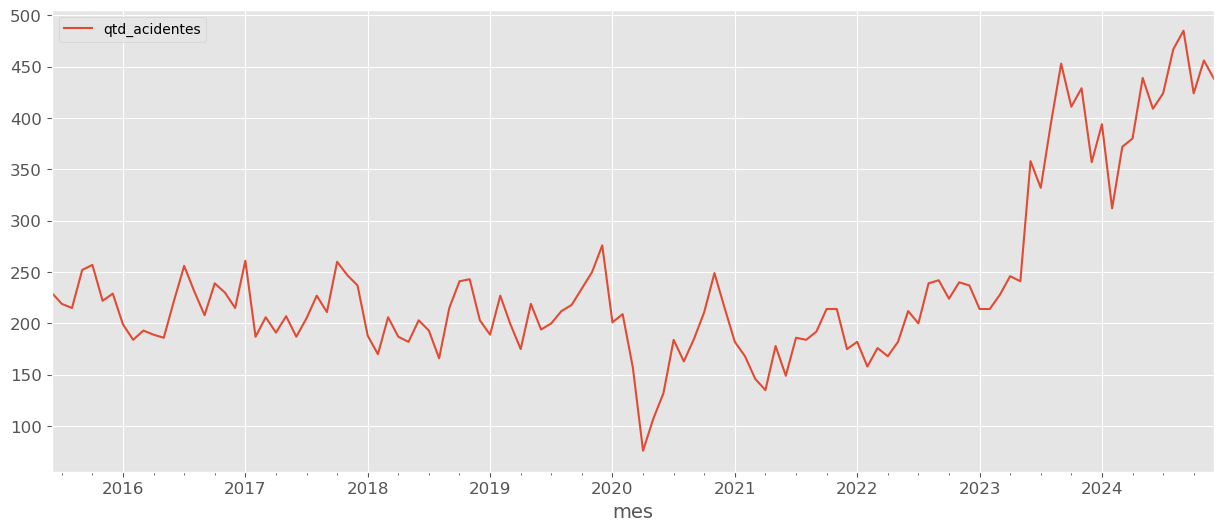

In [29]:
# Plot da Série Temporal 
dados.plot(figsize = (15, 6))
plt.show()

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência. 

- Sazonalidade - O fenômeno se repete em períodos fixos.
- Tendência - Ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Mas, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.


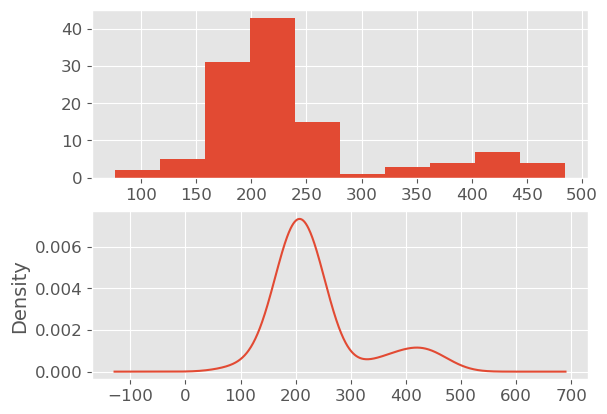

In [30]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados.qtd_acidentes.hist()

# Subplot 2
plt.subplot(212)
dados.qtd_acidentes.plot(kind = 'kde')
plt.show()

Análise:
    
- A distribuição não é perfeitamente gaussiana (distribuição normal).
- A distribuição está levemente inclinada para a esquerda.
- As transformações podem ser úteis antes da modelagem.

Text(0, 0.5, '\nQuantidade de Acidentes')

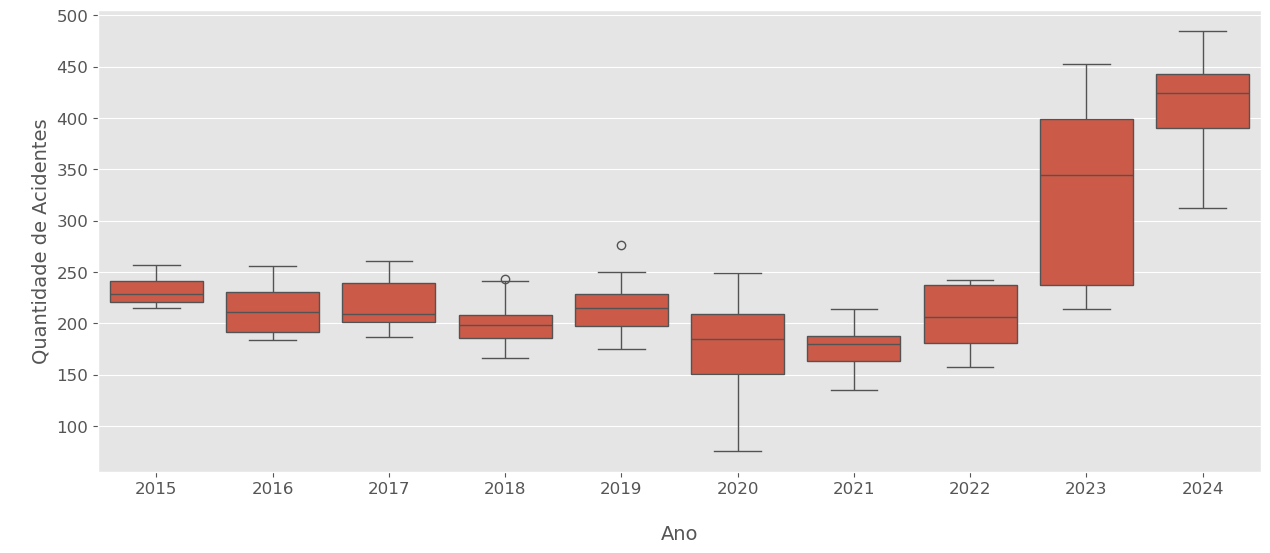

In [31]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize = (15,6))

# Define as variáveis
indice_ano = dados.qtd_acidentes.index.year
valor = dados.qtd_acidentes

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(x = indice_ano, y = valor, ax = ax, data = dados)

plt.xlabel("\nAno")
plt.ylabel("\nQuantidade de Acidentes")

Análise:

- O comportamento da mediana em especial nos últimos anos, confirma uma tendência ascendente.
- Aumento constante da dispersão ao redor da mediana dos dados ao longo do tempo. As caixas vão se tornando cada vez maiores.
- Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

## Visualizando a Decomposição da Série Temporal

In [32]:
# Decomposição Multiplicativa
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(dados, 
                                                        model = 'multiplicative', 
                                                        extrapolate_trend = 'freq')

In [33]:
# Tipo do objeto
type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

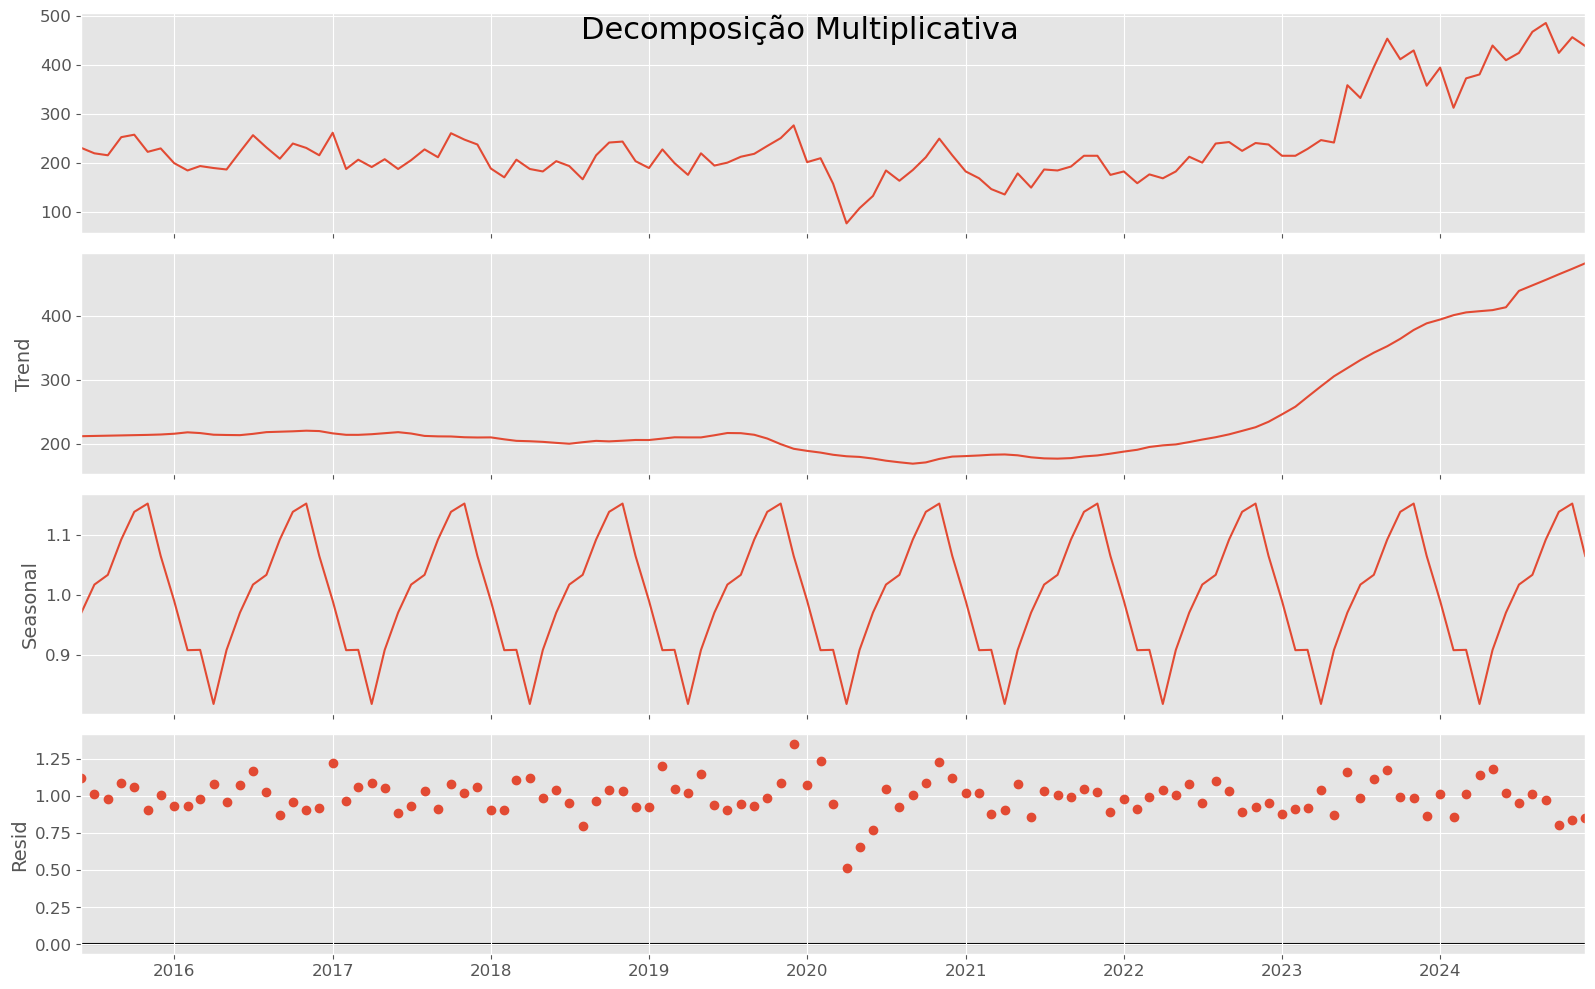

In [34]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
plt.show()

In [35]:
# Decomposição Aditiva
decomposicao_aditiva = sm.tsa.seasonal_decompose(dados, 
                                                 model = 'aditive', 
                                                 extrapolate_trend = 'freq')

In [36]:
# Tipo do objeto
type(decomposicao_aditiva)

statsmodels.tsa.seasonal.DecomposeResult

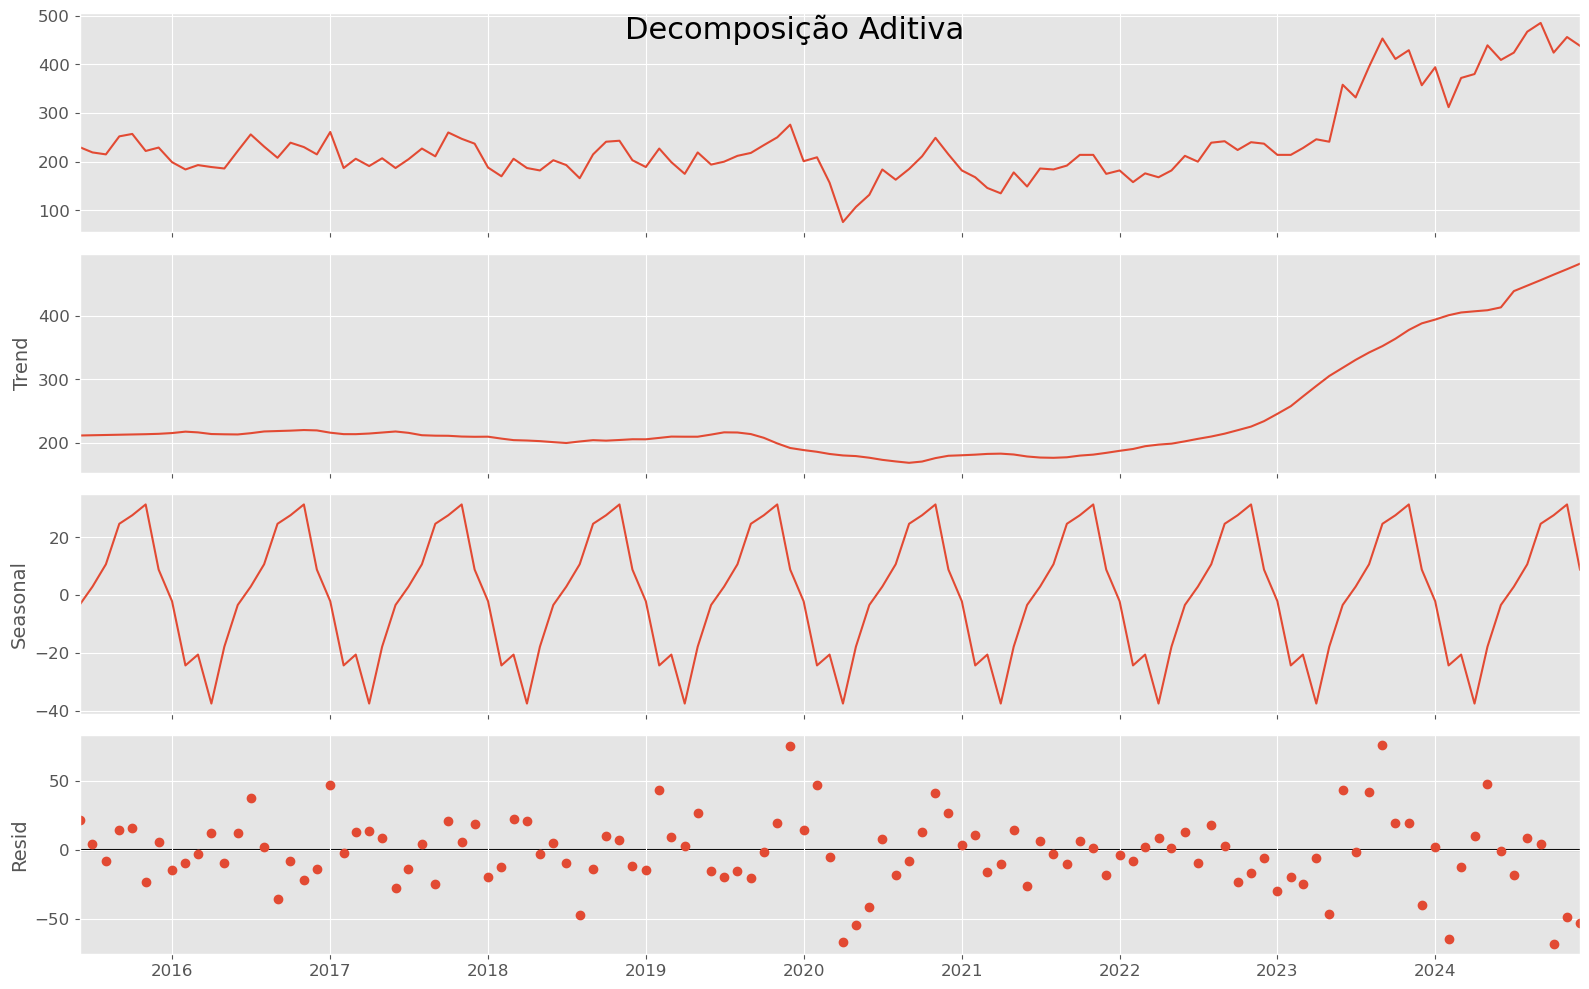

In [37]:
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

> Análise da Decomposição da Série

No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados, em nosso exemplo o número de usuários ativos.

2- A segunda linha mostra a tendência da série, que claramente é uma tendência de crescimento, ou seja, o número de veículos produzidos tende a crescer ao longo do tempo.

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda, momentos em que temos valores maiores ou menores do número de veículos produzidos. Isso talvez possa ser explicado por eventos baseados em calendário (verão, inverno, férias escolares, etc...).

4- A quarta linha é o componete irregular ou resíduo.

Definir **extrapolate_trend = 'freq'** remove valores NaN na tendência e nos resíduos (se existirem, claro).

Se você observar os resíduos da decomposição aditiva, ela é mais dispersa, indicando um possível padrão. A decomposição multiplicativa, no entanto, parece menso disoersa, indicando uma aleatóriedade, o que é bom. 

Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa. Vamos extraí-los e colocá-los em uma tabela de dados.

## Extração dos Componentes da Série Temporal

Regra de extração:

**Valores Reais = (sazonal * tendência * resíduo)**

In [38]:
# Concatena o resultado da decomposição da série
dados_reconstruido = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

In [39]:
# Define o nome das colunas
dados_reconstruido.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

In [40]:
# Mostra o resultado
dados_reconstruido.head()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
mes,,,,
2015-06-01,0.970316,211.598145,1.120218,230.0
2015-07-01,1.017032,212.008693,1.015678,219.0
2015-08-01,1.033299,212.419240,0.979532,215.0
2015-09-01,1.092292,212.829788,1.084000,252.0
2015-10-01,1.138475,213.240336,1.058620,257.0


In [41]:
# Dados originais
dados.head()

,qtd_acidentes
mes,
2015-06-01,230
2015-07-01,219
2015-08-01,215
2015-09-01,252
2015-10-01,257


Se você checar, o produto das colunas Sazonalidade, Tendência e Resíduos deve ser exatamente igual a Valores_Observados.

Por exemplo:

- Série na data 2015-06-01 = 230.0
- Série na data 2015-06-01 = Sazonalidade x Tendência x Resíduos = 0.970316 x 211.598145 x 1.120218 = 230.0

In [42]:
# Cálculo em Python
valor_observado = np.round(0.970316 * 211.598145 * 1.120218)
print(valor_observado)

230.0


Ou seja, isso comprova como uma série temporal é na verdade o conjunto de componentes que podem ser extraídos, transformados, analisados e usados para fazer previsões.

## Propriedades Estatísticas de Séries Temporais

Antes de iniciar qualquer modelagem preditiva em séries temporais é necessário verificar se essas propriedades estatísticas são constantes na série temporal:

- **Estacionariedade**: a série temporal **deve** ser estacionária, ou seja, suas características estatísticas, como média e variância, não mudam ao longo do tempo.


- **Não-autocorrelação**: as observações da série temporal não devem ser fortemente correlacionadas com observações anteriores.


- **Normalidade**: é frequentemente pressuposto que as observações da série temporal são distribuídas normalmente (seguem uma distribuição normal).

### Plot das Rolling Statistics (Estatísticas Móveis)

As estatísticas móveis, também conhecidas como estatísticas rolantes ou estatísticas deslizantes, são uma técnica usada na análise de séries temporais para calcular estatísticas, como média, mediana, soma, variância e desvio padrão, em uma janela deslizante de tamanho fixo ao longo da série. A ideia é analisar e entender as mudanças nas estatísticas locais ao longo do tempo, o que pode ajudar a identificar tendências, sazonalidade, pontos de mudança e outras características dos dados.

Para calcular estatísticas móveis, você define uma janela de tamanho 'n' (onde n é um número inteiro) e move a janela ao longo da série temporal, calculando a estatística desejada para cada subconjunto de dados dentro da janela. A janela avança uma observação de cada vez e o cálculo é repetido até que a janela alcance o final da série.

Por exemplo, para calcular a média móvel de uma série temporal, você seleciona uma janela de tamanho n e calcula a média dos valores dentro da janela. Em seguida, a janela é deslocada uma posição à frente e a média é recalculada para os novos valores na janela. Esse processo é repetido até que a janela atinja o final da série temporal.

In [43]:
# Determinando estatísticas móveis
rolmean = dados['qtd_acidentes'].rolling(window = 12).mean()
rolstd = dados['qtd_acidentes'].rolling(window = 12).std()

In [44]:
# Prepara os dados para o plot
x = dados.index.strftime('%Y-%m').tolist()
y = dados['qtd_acidentes']

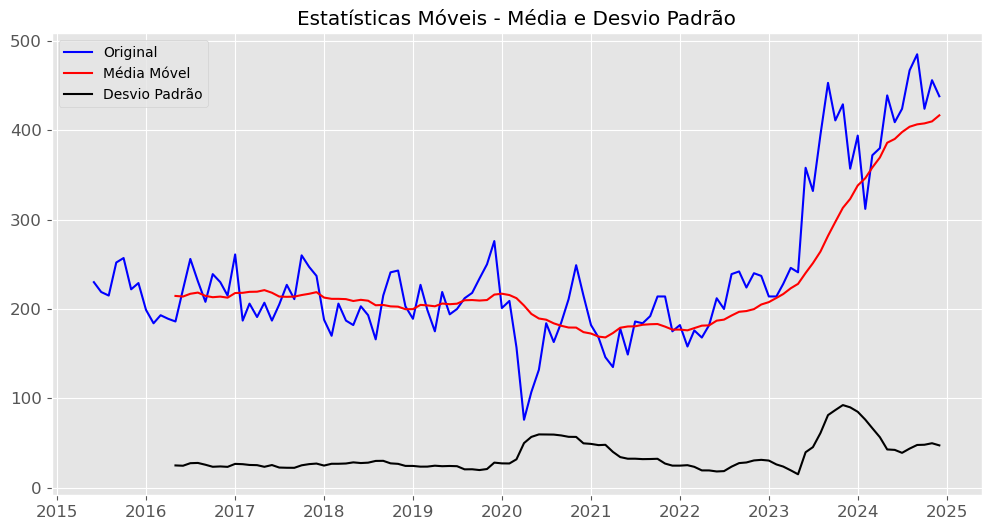

In [45]:
# Plot das estatísticas móveis
plt.figure(figsize = (12, 6))
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc='best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão')
plt.show()

Análise:
    
- Observamos que a média móvel e o desvio padrão não são constantes em relação ao tempo (tendência crescente).
- A série não é, portanto, estacionária.

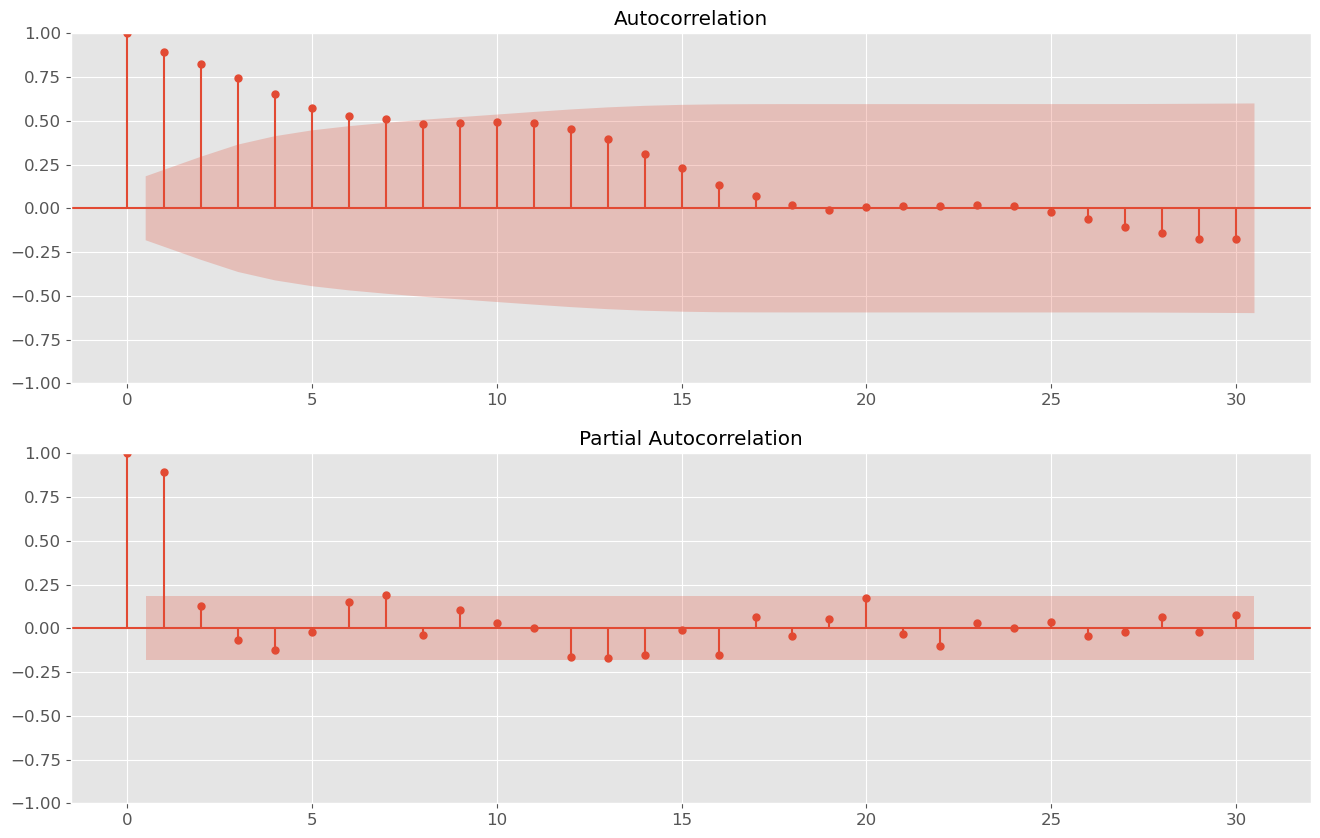

In [46]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
plt.subplot(211)
plot_acf(dados.qtd_acidentes, ax = plt.gca(), lags = 30)

# Plot do gráfico PACF
plt.subplot(212)
plot_pacf(dados.qtd_acidentes, ax = plt.gca(), lags = 30, method = 'ywm')
plt.show()

Interpretação dos Gráficos:
    
No gráfico, o eixo vertical indica a autocorrelação e o horizontal a defasagem. 

A área sombreada indica onde é significativamente diferente de zero. Como é possível ver na imagem, temos diversos valores ACF (barras verticais) acima do limite da área sombreada. Nesses casos, a autocorrelação é diferente de zero, indicando que a série não é aleatória – conforme o esperado.

Algumas barras verticais estão dentro do limite da área sombreada. Ou seja, a autocorrelação entre a série com alguns de seus lags é igual a zero, indicando que não há correlação.

Em termos simples: a área sombreada aponta a significância. Se ultrapassada é porque tem correlação.

Cada barra no gráfico ACF representa o nível de correlação entre a série e seus atrasos em ordem cronológica. A área sombreada indica se o nível de correlação entre a série e cada atraso é significativo ou não. 

O PACF é apenas uma visualização parcial do ACF.

Análise:
    
- Se a série temporal for estacionária, os gráficos do ACF / PACF mostrarão uma "queda rápida na correlação" após um pequeno atraso entre os pontos. Não é o caso em nossos gráficos. A queda lenta (redução do tamanho das barras) indica que essa série não é estacionária.

- Os dados da nossa série não são estacionários, pois um número alto de observações anteriores está correlacionado com valores futuros.

- Intervalos de confiança são desenhados na área sombreada. Por padrão, isso é definido como um intervalo de confiança de 95%, sugerindo que os valores de correlação fora desta área provavelmente são uma correlação e não um acaso estatístico.

- Teremos que transformar essa série em estacionária antes de criar um modelo preditivo. 

Aqui estão os principais aspectos que você busca ao interpretar um gráfico ACF:

**1. Dependência Temporal**

ACF mede a correlação entre observações de uma série temporal separadas por diferentes lags (defasagens). Um pico significativo em um lag específico indica que os valores na série temporal estão correlacionados com seus valores em lags anteriores. Isso é fundamental para identificar se a série possui dependência temporal.

**2. Identificação de Sazonalidade**

Se o gráfico ACF mostra picos regulares em intervalos específicos, isso pode indicar a presença de sazonalidade na série. Por exemplo, um pico significativo a cada 12 lags em dados mensais pode sugerir um padrão sazonal anual.

**3. Determinação da Ordem de Modelos ARIMA**

Para modelos ARIMA (AutoRegressive Integrated Moving Average), a análise do gráfico ACF (junto com o PACF - Função de Autocorrelação Parcial) pode ajudar a determinar a ordem dos componentes AR (autoregressivos) e MA (médias móveis). Por exemplo, um declínio gradual no ACF sugere componentes AR, enquanto um corte brusco após um lag específico sugere componentes MA.

**4. Estacionariedade**

Uma série temporal é estacionária se sua média e variância permanecem constantes ao longo do tempo. No gráfico ACF, uma diminuição muito lenta ou a ausência de diminuição nas autocorrelações pode indicar que a série não é estacionária. A estacionariedade é muitas vezes um pré-requisito para a modelagem eficaz de séries temporais.

**5. Ruído Branco**

Se todas as autocorrelações são insignificantes (ou seja, próximas de zero para todos os lags), a série pode ser um ruído branco, indicando que os valores são independentes e identicamente distribuídos. Isso significa que a série não possui padrões previsíveis ou dependência temporal significativa.

### Teste Estatístico Dickey-Fuller Aumentado

O Teste Estatístico Dickey-Fuller Aumentado (ADF, do inglês Augmented Dickey-Fuller) é uma versão ampliada do teste de Dickey-Fuller, usado para verificar a presença de raiz unitária em uma série temporal, ou seja, para testar a estacionariedade da série. Uma série temporal é considerada estacionária quando suas propriedades estatísticas, como média e variância, são constantes ao longo do tempo. A presença de uma raiz unitária indica que a série é não estacionária, o que pode afetar a análise e a modelagem dessa série.

O teste ADF é particularmente útil porque pode acomodar uma estrutura de autocorrelação mais complexa em comparação com o teste Dickey-Fuller original. Isso é feito incluindo termos de defasagem da variável dependente (lags) na equação de teste para controlar a autocorrelação serial.

Estas são as hipóteses do teste:

- Hipótese Nula (H0): A série possui uma raiz unitária (γ=0), indicando não estacionariedade.
- Hipótese Alternativa (H1): A série não possui raiz unitária (γ<0 para o caso unicaudal), indicando estacionariedade.

Ou, de forma mais simples:

- Hipótese Nula (H0): A série temporal não é estacionária.
- Hipótese Alternativa (H1) - A série temporal é estacionária.

In [47]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

# Teste
dfteste = adfuller(dados.qtd_acidentes, autolag = 'AIC')
'''
O AIC é uma métrica utilizada para comparar modelos estatísticos, 
considerando a qualidade do ajuste dos dados e a complexidade do modelo. 
O principal objetivo do AIC é selecionar o modelo que melhor explica os dados 
com a menor quantidade de parâmetros possível, buscando um equilíbrio ideal entre 
a adequação do modelo e sua simplicidade.
'''


# Formatando a saída
dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dfteste[4].items():
    dfsaida['Valor Crítico (%s)'%key] = value

# Print
print (dfsaida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste              1.654414
Valor-p                           0.998012
Número de Lags Consideradas       9.000000
Número de Observações Usadas    105.000000
Valor Crítico (1%)               -3.494220
Valor Crítico (5%)               -2.889485
Valor Crítico (10%)              -2.581676
dtype: float64


Análise:

- O Valor-p é maior que 0.05. Não temos evidências estatísticas para rejeitar a hipótese nula de que a série não é estacionária. Logo, podemos concluir que a série NÃO é estacionária.

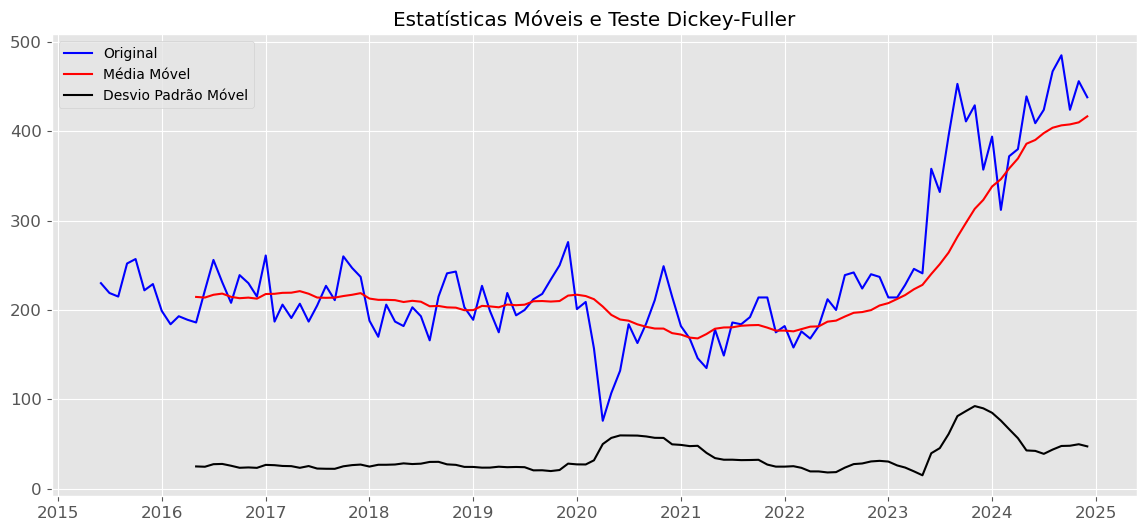


Resultado do Teste Dickey-Fuller:
Estatística do Teste              1.654414
Valor-p                           0.998012
Número de Lags Consideradas       9.000000
Número de Observações Usadas    105.000000
Valor Crítico (1%)               -3.494220
Valor Crítico (5%)               -2.889485
Valor Crítico (10%)              -2.581676
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [48]:
# Executando a função
dsa_testa_estacionaridade(dados)

O conjunto de dados é **não estacionário**, o que significa que a média e a variância das observações mudam ao longo do tempo. Isso dificulta a modelagem por métodos estatísticos clássicos, como ARIMA, e métodos mais sofisticados de aprendizado de máquina, como redes neurais.

A não estacionaridade é causada pelo que parece ser uma tendência crescente e um componente de sazonalidade.

Além disso, a quantidade de alteração ou a variância está aumentando com o tempo. Isso fica claro quando você olha para o tamanho do componente sazonal e percebe que a amplitude (de baixo para cima) está aumentando (vimos isso com o gráfico dos boxplots).


## Transformação de Log

Séries temporais podem ser linearizadas usando o logaritmo dos valores. Isso é chamado de transformação de log. 

As transformações de log são populares em dados de séries temporais, pois são eficazes na remoção da variação exponencial.

É importante observar que esta operação assume que os valores são positivos e diferentes de zero. É comum transformar observações adicionando uma constante fixa para garantir que todos os valores de entrada atendam a esse requisito. Por exemplo: serie_transformada_y = log(constante + x)

In [49]:
# Criar um coluna transformada usando np.log() 
dados['qtd_acidentes_log'] = np.log(dados['qtd_acidentes'])
dados.head()

,qtd_acidentes,qtd_acidentes_log
mes,,
2015-06-01,230,5.438079
2015-07-01,219,5.389072
2015-08-01,215,5.370638
2015-09-01,252,5.529429
2015-10-01,257,5.549076


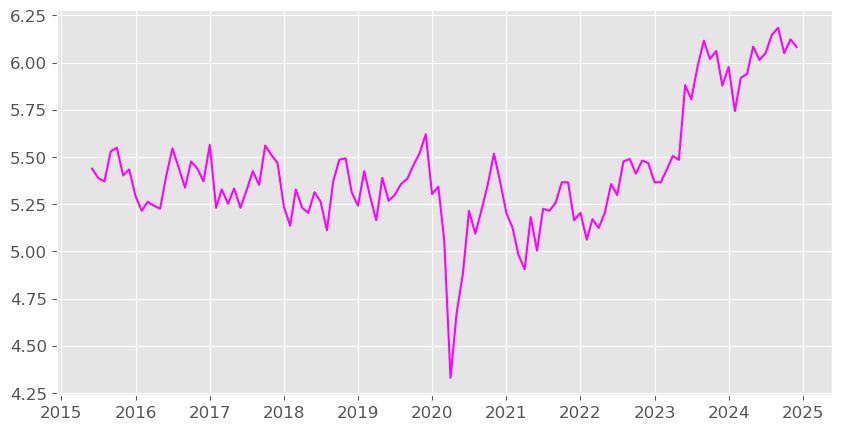

In [50]:
# Plot da série transformada
plt.figure(figsize = (10, 5))
plt.plot(dados['qtd_acidentes_log'], color = "magenta")
plt.show()

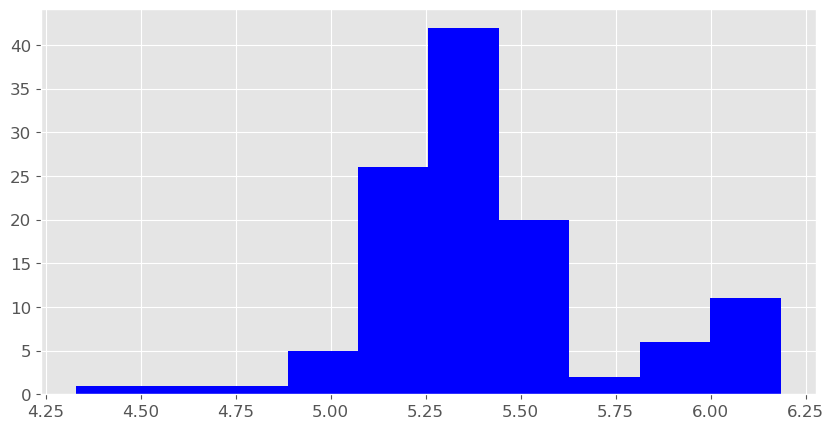

In [51]:
# Histograma da série transformada
plt.figure(figsize = (10, 5))
plt.hist(dados['qtd_acidentes_log'], color = "blue")
plt.show()

Análise:

-  A execução do exemplo resulta em uma tendência que parece mais linear. O gráfico de linha mostra um crescimento e variação aparentemente lineares.

- O histograma também mostra uma distribuição de observações do tipo gaussiana mais uniforme.

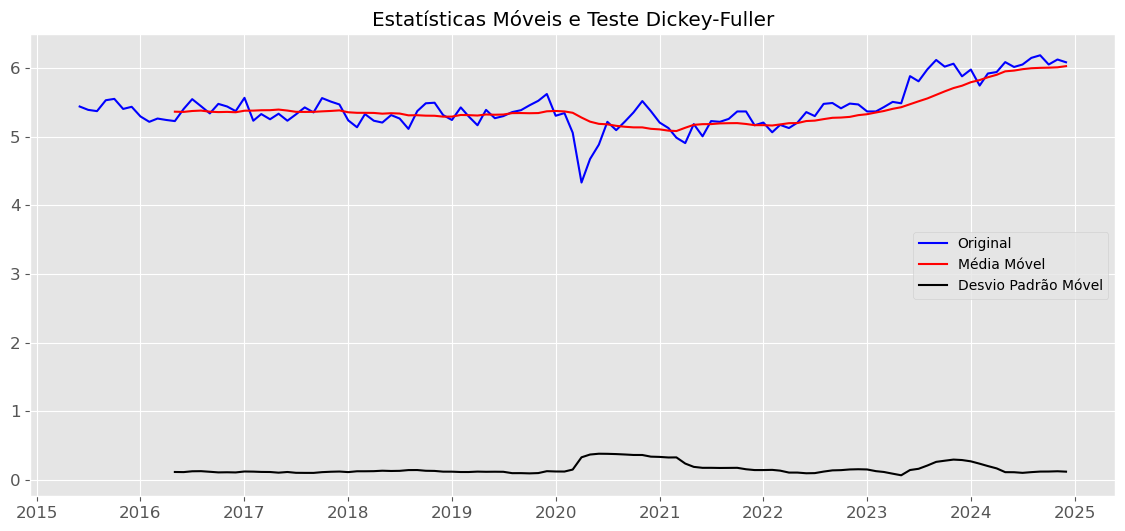


Resultado do Teste Dickey-Fuller:
Estatística do Teste              0.927185
Valor-p                           0.993435
Número de Lags Consideradas       9.000000
Número de Observações Usadas    105.000000
Valor Crítico (1%)               -3.494220
Valor Crítico (5%)               -2.889485
Valor Crítico (10%)              -2.581676
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [52]:
dsa_testa_estacionaridade(dados['qtd_acidentes_log'])

## Transformação de Raiz Quadrada

Uma série temporal que tem uma tendência quadrática de crescimento pode ser linearizada calculando sua raiz quadrada.

É possível que nosso conjunto de dados mostre um crescimento quadrático. Se esse for o caso, poderíamos esperar que uma transformação de raiz quadrada, para reduzir a tendência de crescimento, seja linear e alterar a distribuição de observações para talvez ser quase gaussiana.

In [53]:
# Criar um coluna transformada usando np.sqrt()
dados['qtd_acidentes_sqrt'] = np.sqrt(dados['qtd_acidentes'])
dados.head()

,qtd_acidentes,qtd_acidentes_log,qtd_acidentes_sqrt
mes,,,
2015-06-01,230,5.438079,15.165751
2015-07-01,219,5.389072,14.798649
2015-08-01,215,5.370638,14.662878
2015-09-01,252,5.529429,15.874508
2015-10-01,257,5.549076,16.031220


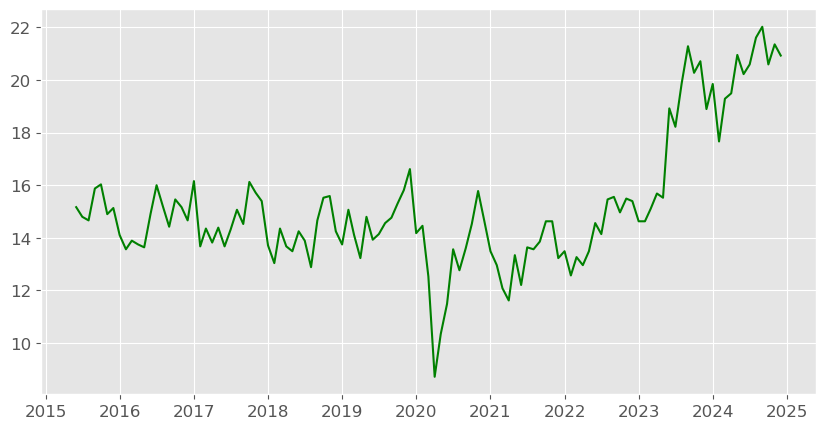

In [54]:
# Gráfico de Linha
plt.figure(figsize = (10, 5))
plt.plot(dados['qtd_acidentes_sqrt'], color = "green")
plt.show()

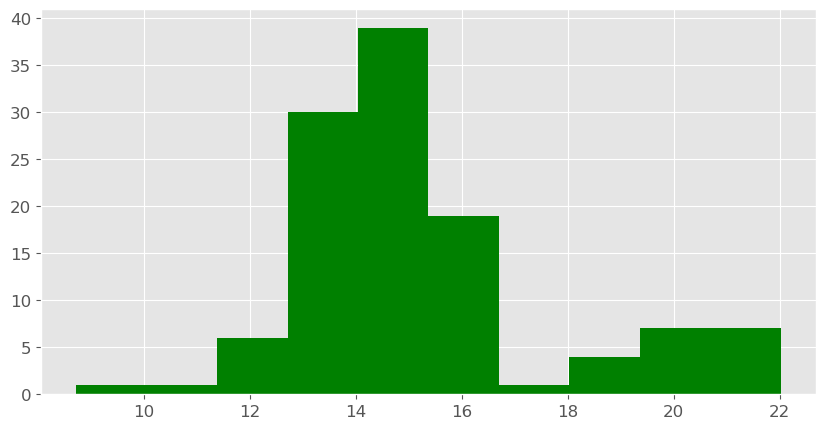

In [55]:
# Histograma
plt.figure(figsize = (10, 5))
plt.hist(dados['qtd_acidentes_sqrt'], color = "green")
plt.show()

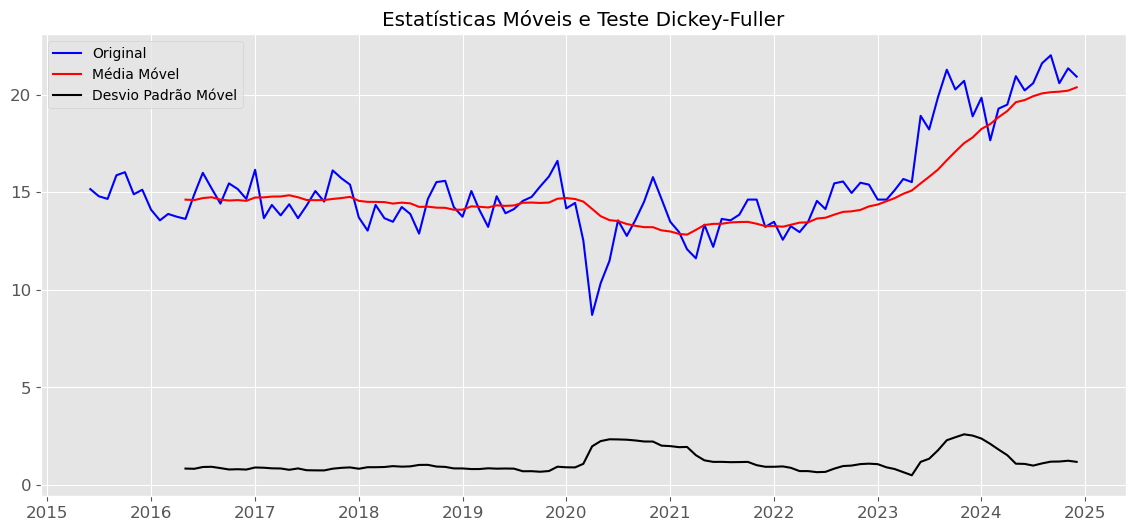


Resultado do Teste Dickey-Fuller:
Estatística do Teste              1.365499
Valor-p                           0.996952
Número de Lags Consideradas       9.000000
Número de Observações Usadas    105.000000
Valor Crítico (1%)               -3.494220
Valor Crítico (5%)               -2.889485
Valor Crítico (10%)              -2.581676
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [56]:
dsa_testa_estacionaridade(dados['qtd_acidentes_sqrt'])

## Transformação Box-Cox

A transformação de raiz quadrada e a transformação de log pertencem a uma classe de transformações denominadas transformações de potência.

A transformação Box-Cox é um método de transformação de dados configurável que suporta a raiz quadrada e a transformação de log, bem como um conjunto de transformações relacionadas.

Mais do que isso, pode ser configurado para avaliar um conjunto de transformações automaticamente e selecionar o melhor ajuste. A série resultante pode ser mais linear e a distribuição resultante mais gaussiana ou uniforme, dependendo do processo que a gerou.

A biblioteca scipy.stats fornece uma implementação da transformação Box-Cox. A função boxcox() usa um argumento, chamado lambda, que controla o tipo de transformação a ser executada.

Abaixo estão alguns valores comuns para lambda

- lambda = -1. é uma transformação recíproca.
- lambda = -0,5 é uma transformação de raiz quadrada recíproca.
- lambda = 0,0 é uma transformação de log.
- lambda = 0,5 é uma transformação de raiz quadrada.
- lambda = 1.0 não é transformação.

In [57]:
# # Criar um coluna transformada usando Box-Cox
dados['qtd_acidentes_box'] = boxcox(dados['qtd_acidentes'], lmbda = 0.0)
dados.head()

,qtd_acidentes,qtd_acidentes_log,qtd_acidentes_sqrt,qtd_acidentes_box
mes,,,,
2015-06-01,230,5.438079,15.165751,5.438079
2015-07-01,219,5.389072,14.798649,5.389072
2015-08-01,215,5.370638,14.662878,5.370638
2015-09-01,252,5.529429,15.874508,5.529429
2015-10-01,257,5.549076,16.031220,5.549076


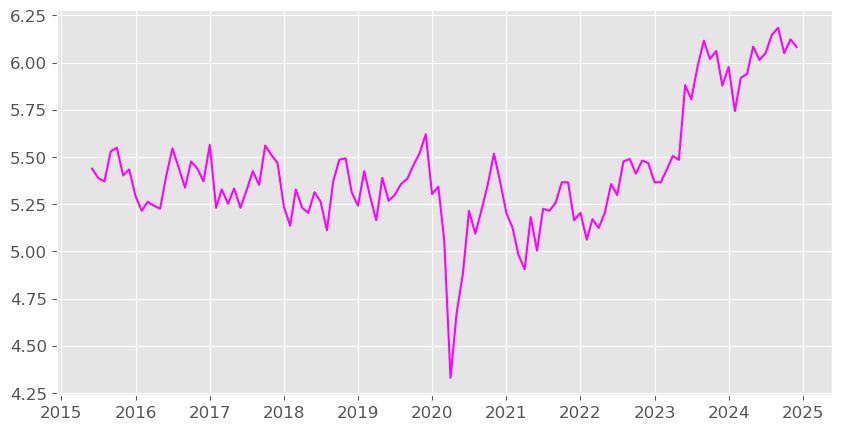

In [58]:
# Plot da série transformada
plt.figure(figsize = (10, 5))
plt.plot(dados['qtd_acidentes_box'], color = "magenta")
plt.show()

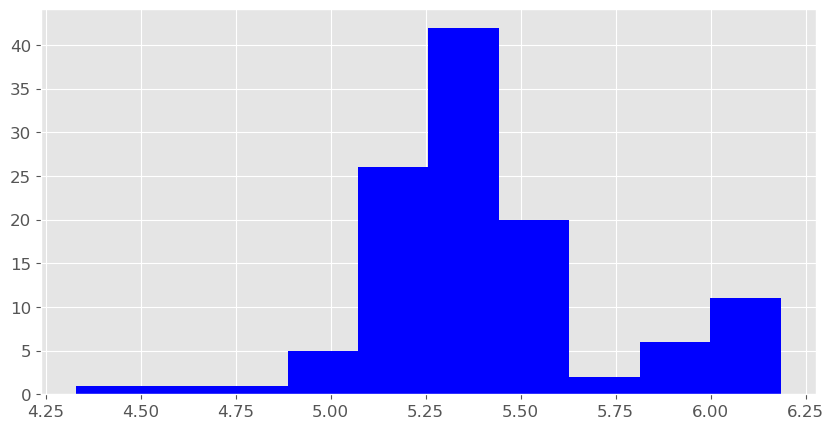

In [59]:
# Histograma
plt.figure(figsize = (10, 5))
plt.hist(dados['qtd_acidentes_box'], color = "blue")
plt.show()

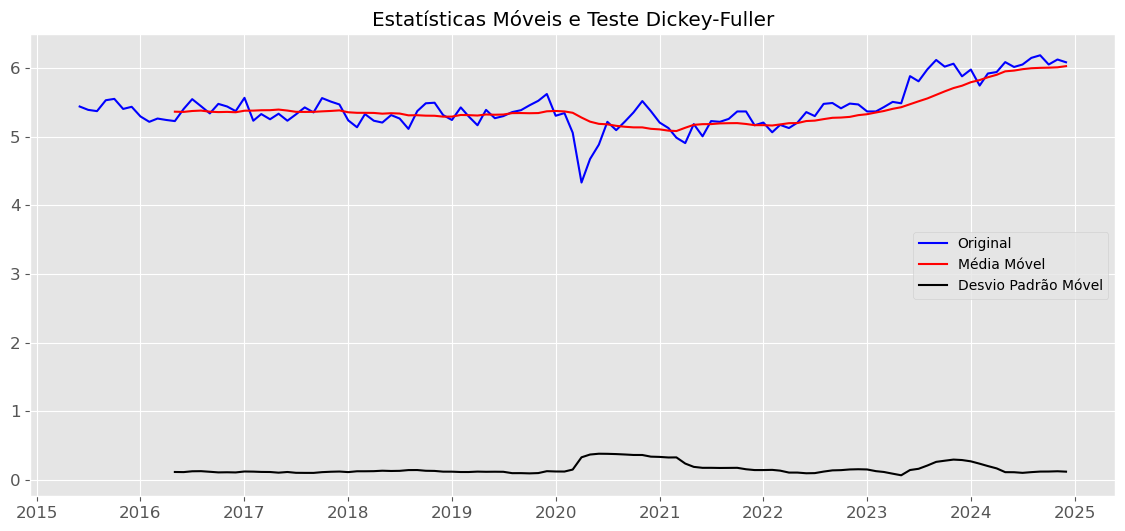


Resultado do Teste Dickey-Fuller:
Estatística do Teste              0.927185
Valor-p                           0.993435
Número de Lags Consideradas       9.000000
Número de Observações Usadas    105.000000
Valor Crítico (1%)               -3.494220
Valor Crítico (5%)               -2.889485
Valor Crítico (10%)              -2.581676
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [60]:
dsa_testa_estacionaridade(dados['qtd_acidentes_box'])

In [61]:
# Aplicando Transformação Box-Cox
dados['qtd_acidentes_box_2'], lam_value = boxcox(dados['qtd_acidentes'])
print('Valor Ideal de Lambda: %f' % lam_value)
dados.head()

Valor Ideal de Lambda: -0.318863


,qtd_acidentes,qtd_acidentes_log,qtd_acidentes_sqrt,qtd_acidentes_box,qtd_acidentes_box_2
mes,,,,,
2015-06-01,230,5.438079,15.165751,5.438079,2.582377
2015-07-01,219,5.389072,14.798649,5.389072,2.573655
2015-08-01,215,5.370638,14.662878,5.370638,2.570339
2015-09-01,252,5.529429,15.874508,5.529429,2.598275
2015-10-01,257,5.549076,16.031220,5.549076,2.601634


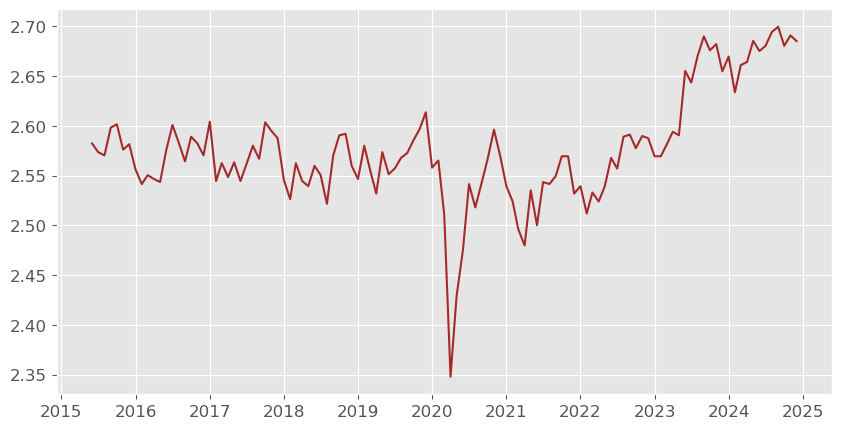

In [62]:
# Plot da série transformada
plt.figure(figsize = (10, 5))
plt.plot(dados['qtd_acidentes_box_2'], color = "brown")
plt.show()

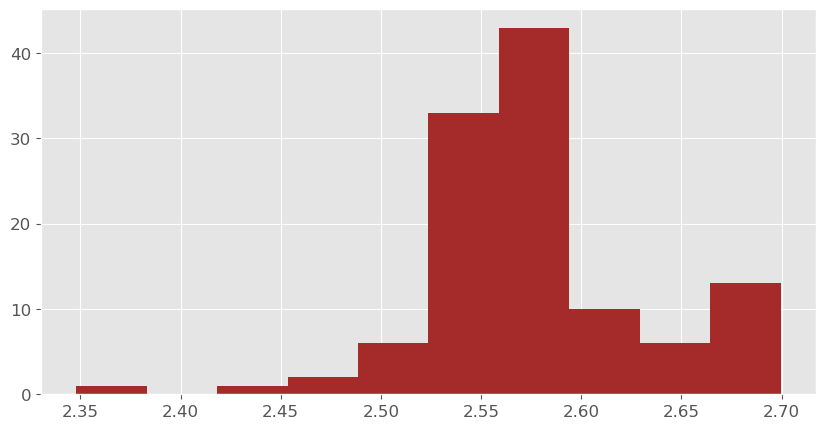

In [63]:
# Histograma
plt.figure(figsize = (10, 5))
plt.hist(dados['qtd_acidentes_box_2'], color = "brown")
plt.show()

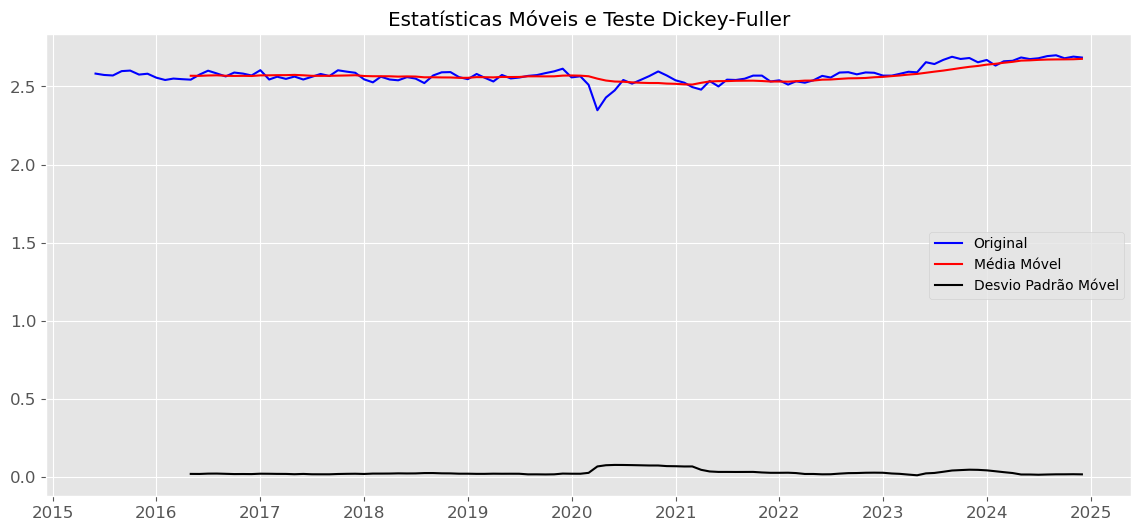


Resultado do Teste Dickey-Fuller:
Estatística do Teste             -2.627090
Valor-p                           0.087527
Número de Lags Consideradas       0.000000
Número de Observações Usadas    114.000000
Valor Crítico (1%)               -3.489058
Valor Crítico (5%)               -2.887246
Valor Crítico (10%)              -2.580481
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [64]:
dsa_testa_estacionaridade(dados['qtd_acidentes_box_2'])

Análise:

- A execução do exemplo gerou o valor lambda de 0.087527.

- Podemos ver que isso está muito próximo de um valor lambda de 0,0, resultando em uma transformação de log mais forte (e menor) que 0.5 para a transformação de raiz quadrada.

Aparentemente nenhuma das técnicas anteriores apresentou resultado para tornar nossa série estacionária.

## Suavização Através da Média Móvel Simples


A Suavização Através da Média Móvel Simples é uma técnica utilizada em análise de séries temporais para suavizar as flutuações de curto prazo e destacar tendências de longo prazo.

Ela é amplamente utilizada em diversos campos, como economia, meteorologia, e engenharia, para modelar e prever comportamentos futuros com base em dados históricos.

O Que é Média Móvel Simples?

A Média Móvel Simples é o cálculo da média aritmética de um conjunto definido de valores ao longo de um período específico. Essa média é "móvel" porque é recalculada continuamente à medida que o tempo avança, adicionando o valor mais recente e removendo o valor mais antigo do conjunto.

Como é feito O Cálculo da Média Móvel Simples?

Para calcular a Média Móvel Simples de uma série temporal, você deve:

1. Definir o período da média móvel: Esse período (n) é o número de pontos de dados que serão utilizados para calcular cada média. Por exemplo, uma média móvel de 7 dias usa os últimos 7 pontos de dados.

2. Calcular a média para cada ponto: Para cada ponto na série temporal, some os valores dos últimos n períodos e divida pelo número de períodos (n). Isso lhe dará a média móvel para aquele ponto.

3. Deslocar-se pela série temporal: Avance um período e repita o cálculo para o próximo ponto, adicionando o novo valor ao conjunto e removendo o valor mais antigo.

- Calculamos a média de valores 'k' consecutivos, dependendo da frequência da série temporal.
- Aqui podemos calcular a média do último 1 ano, ou seja, os últimos 12 valores.
- Uma desvantagem dessa abordagem específica é que o período de tempo deve ser estritamente definido.

In [65]:
# Criar um coluna transformadacom a média móvel de 12 meses 
dados = dados_original.copy()
dados['qtd_acidentes_media_movel_simples'] = dados.rolling(window = 12).mean()

In [66]:
dados

,qtd_acidentes,qtd_acidentes_media_movel_simples
mes,,
2015-06-01,230,NaN
2015-07-01,219,NaN
2015-08-01,215,NaN
2015-09-01,252,NaN
2015-10-01,257,NaN
...,...,...
2024-08-01,467,403.916667
2024-09-01,485,406.583333
2024-10-01,424,407.666667


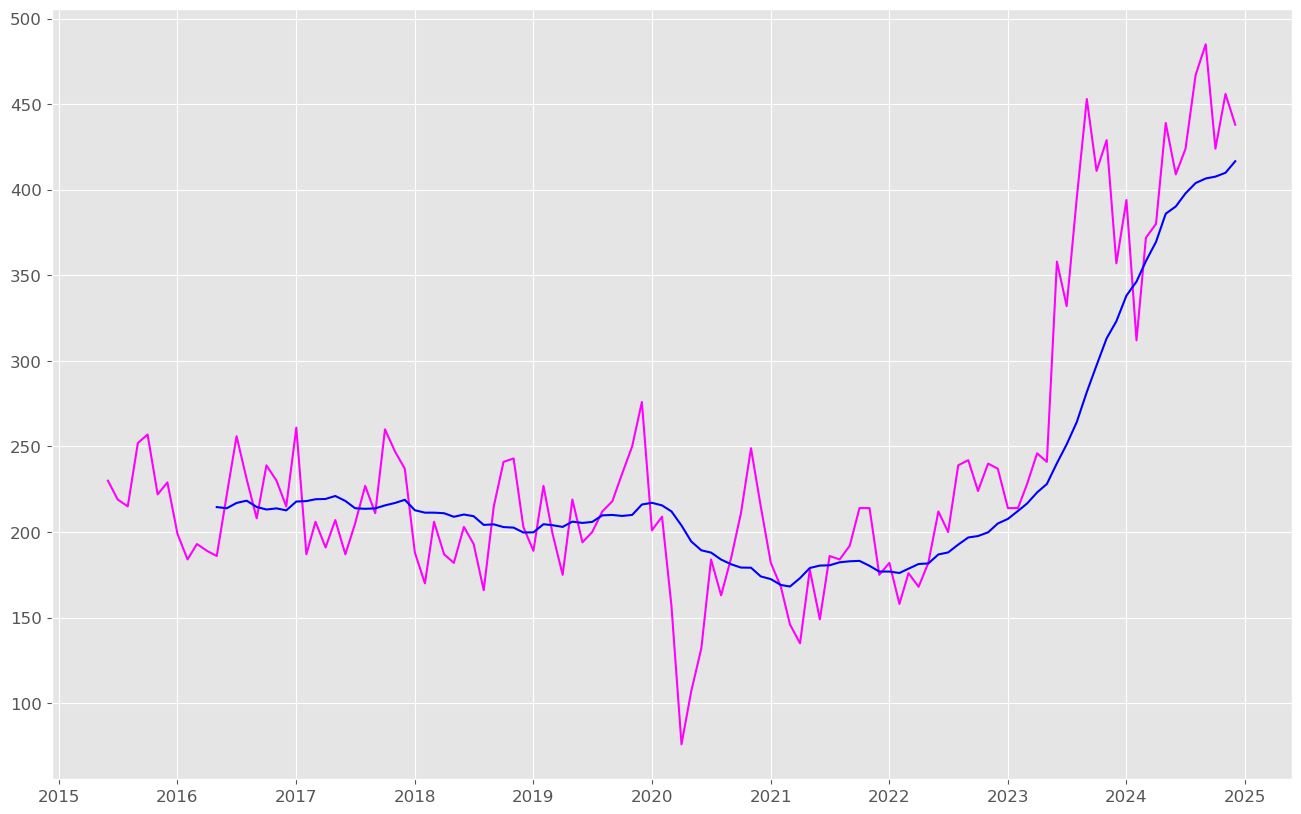

In [67]:
# Plot da série original
plt.plot(dados['qtd_acidentes'], color = 'magenta')
plt.plot(dados['qtd_acidentes_media_movel_simples'], color = 'blue')
plt.show();

In [68]:
# Calculando a diferença entre a série original e a série suavizada
diff_original_suavizada = dados['qtd_acidentes'] - dados['qtd_acidentes_media_movel_simples']
diff_original_suavizada.tail(20)

mes
2023-05-01     12.916667
2023-06-01    117.750000
2023-07-01     80.750000
2023-08-01    130.750000
2023-09-01    171.166667
2023-10-01    113.583333
2023-11-01    115.833333
2023-12-01     33.833333
2024-01-01     55.833333
2024-02-01    -34.333333
2024-03-01     13.666667
2024-04-01     10.500000
2024-05-01     53.000000
2024-06-01     18.750000
2024-07-01     26.083333
2024-08-01     63.083333
2024-09-01     78.416667
2024-10-01     16.333333
2024-11-01     46.083333
2024-12-01     21.333333
Freq: MS, dtype: float64

In [69]:
# Vamos remover os valores NA para testar a estacionaridade
diff_original_suavizada.dropna(inplace = True)

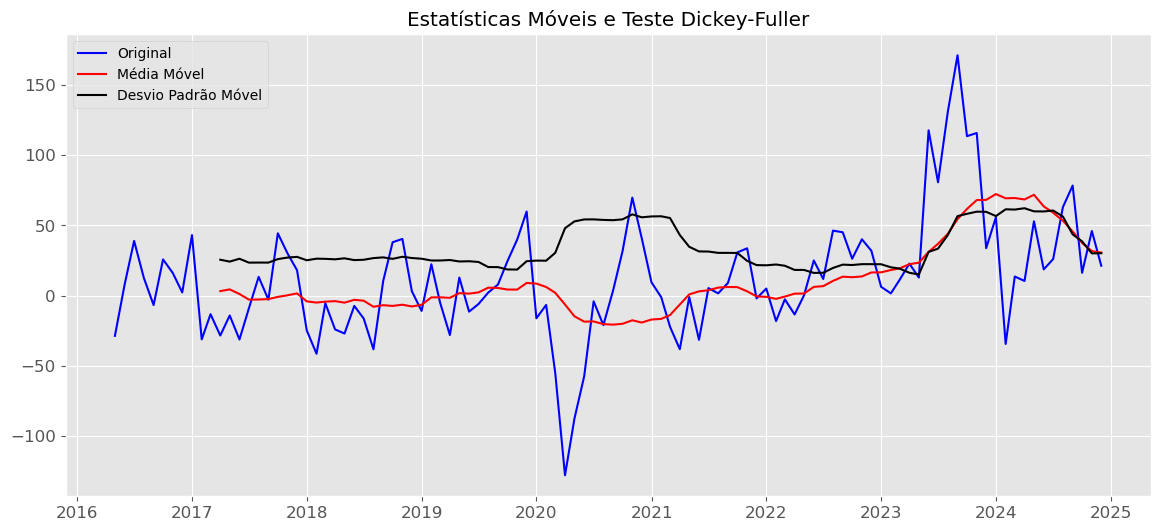


Resultado do Teste Dickey-Fuller:
Estatística do Teste            -2.587812
Valor-p                          0.095543
Número de Lags Consideradas      6.000000
Número de Observações Usadas    97.000000
Valor Crítico (1%)              -3.499637
Valor Crítico (5%)              -2.891831
Valor Crítico (10%)             -2.582928
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [70]:
# Executando o teste de estacionaridade
dsa_testa_estacionaridade(diff_original_suavizada)

### Suavização Através da Média Móvel Ponderada Exponencial

A Suavização Através da Média Móvel Ponderada Exponencial (MMPE), também conhecida como Média Móvel Exponencial (MME), é uma técnica de análise de séries temporais que serve para suavizar os dados e destacar tendências de longo prazo, minimizando ao mesmo tempo a influência de flutuações de curto prazo.

Diferente da Média Móvel Simples (MMS), a MMPE atribui pesos que diminuem exponencialmente para os dados mais antigos, o que significa que os valores mais recentes têm mais influência sobre a média.

O que é Média Móvel Ponderada Exponencial?

A Média Móvel Ponderada Exponencial é uma forma de média móvel que dá mais peso aos dados mais recentes. O “exponencial” refere-se ao modo como os pesos diminuem exponencialmente.

Um dos principais benefícios da MMPE sobre a MMS é a sua capacidade de reagir mais rapidamente às mudanças nos dados, tornando-a particularmente útil em mercados financeiros e outras aplicações onde a rapidez na detecção de tendências é essencial.

Como é feito o cálculo da Média Móvel Ponderada Exponencial?

O cálculo da MMPE envolve algumas etapas:

1. Escolha do período de suavização (α): O primeiro passo é definir o fator de suavização α (alfa), também conhecido como a constante de suavização. α é determinado pela fórmula 2/(N+1), onde N é o número de períodos. Por exemplo, para uma média móvel de 10 dias, α seria 2/(10+1) = 2/11.

2. Calcule a MMPE inicial: A MMPE do primeiro ponto de dados não pode ser calculada da mesma maneira que os outros, pois não há dados anteriores suficientes. Geralmente, usa-se a média simples dos primeiros N pontos de dados como o ponto inicial, ou simplesmente o primeiro valor da série.

3. Aplique a fórmula da MMPE: Para cada ponto de dados subsequente, a MMPE é recalculada.

- Para superar o problema de escolher uma janela definida na média móvel, podemos usar a média móvel ponderada exponencial.
- Adotamos uma "média móvel ponderada", em que valores mais recentes recebem um peso maior.
- Pode haver muitas técnicas para atribuir pesos. Uma popular é a média móvel ponderada exponencialmente em que os pesos são atribuídos a todos os valores anteriores com um fator de redução.

A função ewm() do Pandas permite aplicar esse método com facilidade.

In [71]:
# Aplicando suavização exponencial
dados = dados_original.copy()
serie_suavizada_exp = dados.ewm(alpha = 0.2, adjust = True).mean()
serie_suavizada_exp

,qtd_acidentes
mes,
2015-06-01,230.000000
2015-07-01,223.888889
2015-08-01,220.245902
2015-09-01,231.002710
2015-10-01,238.736316
...,...
2024-08-01,407.306657
2024-09-01,422.845326
2024-10-01,423.076261


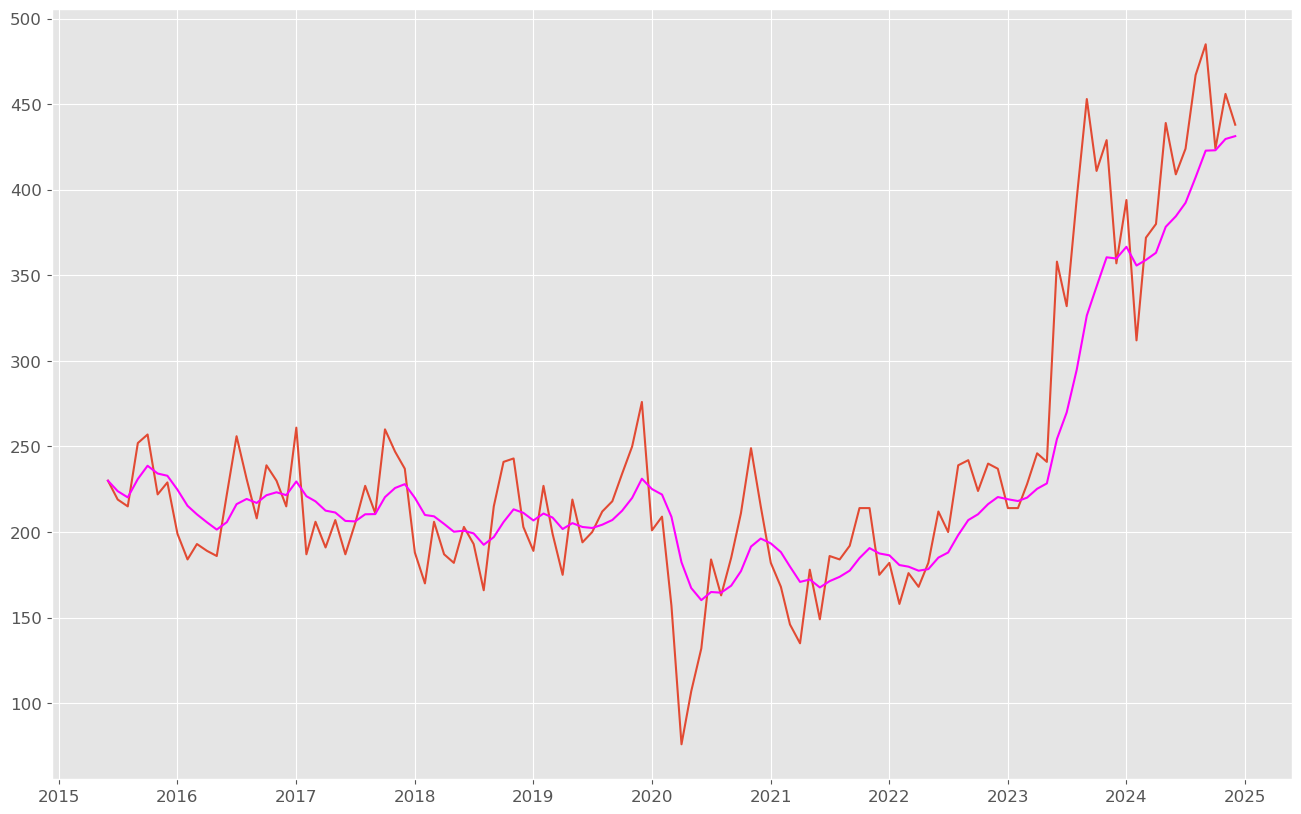

In [72]:
# Plt das séries
plt.plot(dados)
plt.plot(serie_suavizada_exp, color = 'magenta')
plt.show();

In [73]:
# Diferença
diff_original_suav_exp = dados.qtd_acidentes - serie_suavizada_exp.qtd_acidentes

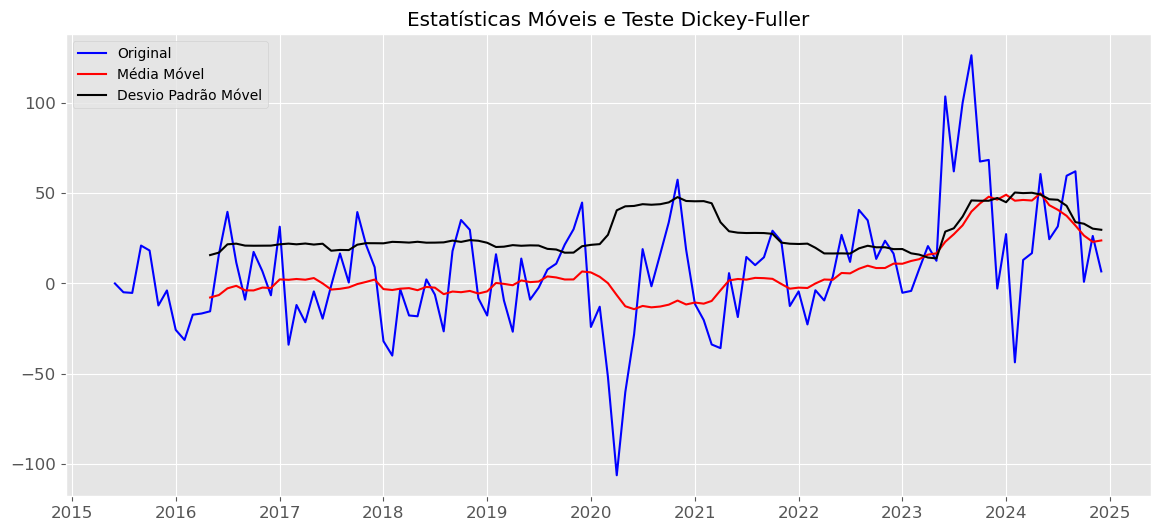


Resultado do Teste Dickey-Fuller:
Estatística do Teste             -1.569901
Valor-p                           0.498693
Número de Lags Consideradas       9.000000
Número de Observações Usadas    105.000000
Valor Crítico (1%)               -3.494220
Valor Crítico (5%)               -2.889485
Valor Crítico (10%)              -2.581676
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [74]:
# Executando o teste de estacionaridade
dsa_testa_estacionaridade(diff_original_suav_exp)

## Diferenciação Para Remover Tendência


Diferenciação é uma técnica fundamental na modelagem de séries temporais, utilizada para tornar uma série temporal estacionária, ou seja, para estabilizar a média da série ao longo do tempo, reduzindo ou eliminando tendências e sazonalidades.

Isso é importante porque muitos modelos de previsão e análise de séries temporais, como ARIMA (Autoregressive Integrated Moving Average), assumem que a série é estacionária para fazer previsões precisas.

O que significa tornar uma série temporal estacionária?

Uma série temporal é considerada estacionária quando suas propriedades estatísticas, como média, variância e autocorrelação, permanecem constantes ao longo do tempo.

Na prática, isso significa que a série não exibe tendências de longo prazo ou padrões sazonais que se alteram ao longo do tempo.

A estacionariedade é importante porque facilita a modelagem da série, permitindo que as previsões sejam feitas com base na suposição de que o futuro se comportará como o passado.

Como é feita a diferenciação?

A diferenciação é realizada subtraindo o valor atual da série temporal pelo seu valor anterior.

Vamos primeiro colocar os dados na mesma escala com a transformação de log e em seguida aplicar a diferenciação.

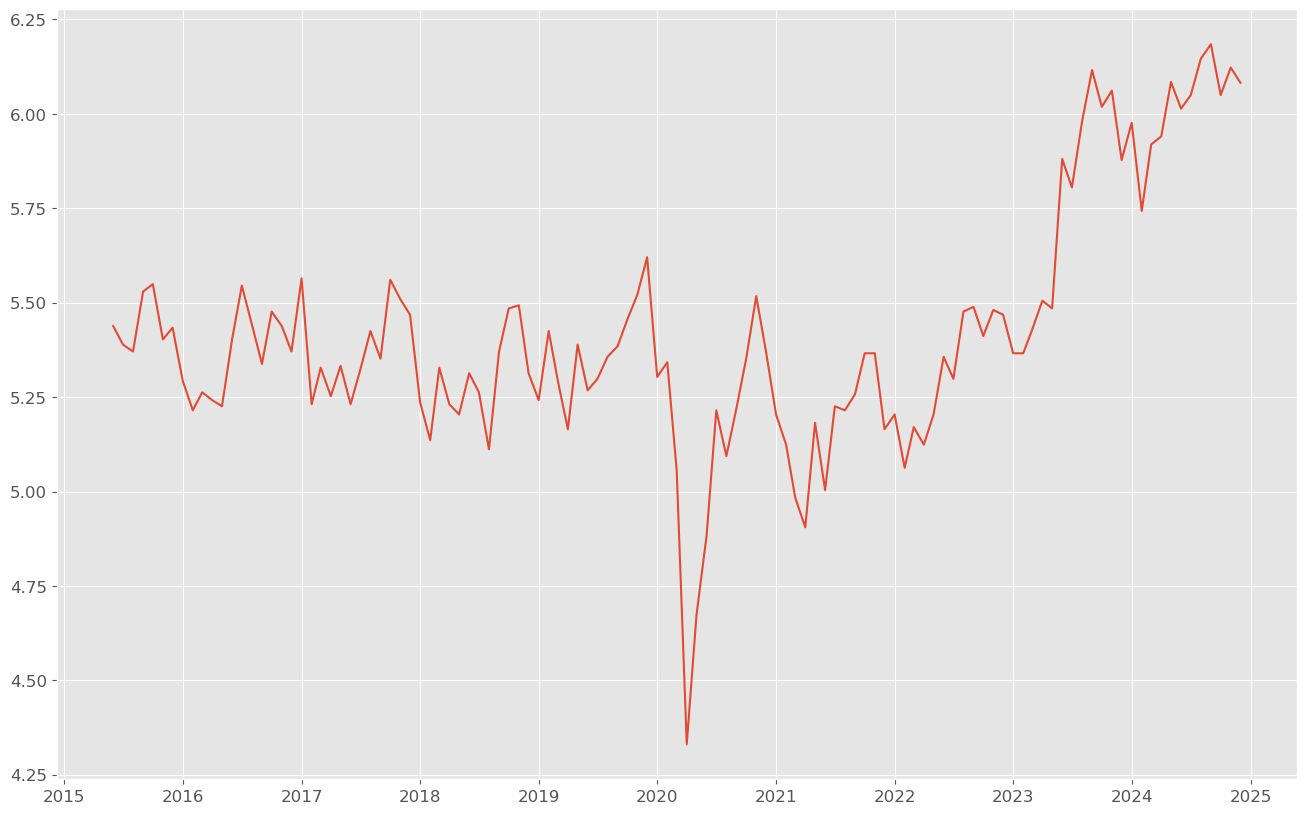

In [75]:
# Transformação de log
dados_serie_log = np.log(dados_original)
plt.plot(dados_serie_log)

In [76]:
dados_serie_log.head()

,qtd_acidentes
mes,
2015-06-01,5.438079
2015-07-01,5.389072
2015-08-01,5.370638
2015-09-01,5.529429
2015-10-01,5.549076


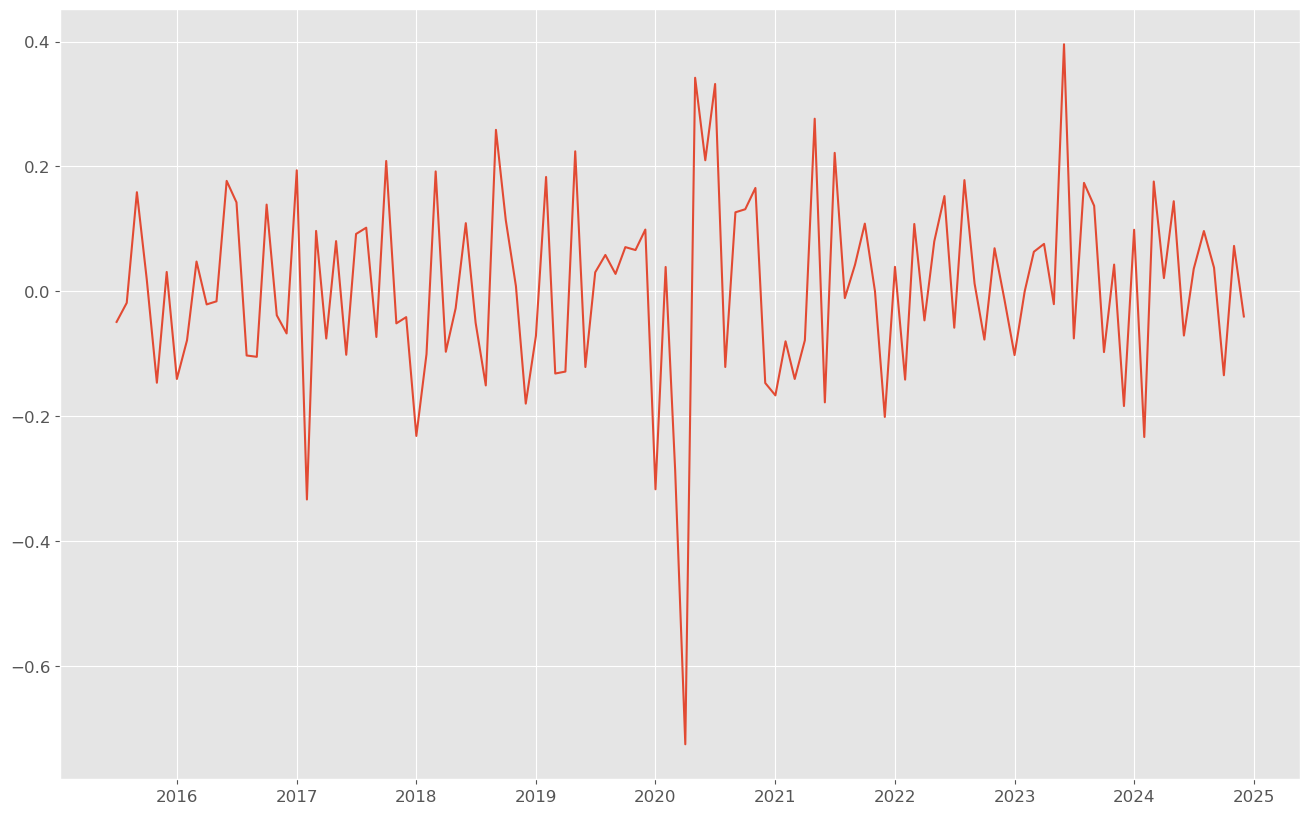

mes
2015-06-01         NaN
2015-07-01   -0.049008
2015-08-01   -0.018434
2015-09-01    0.158791
2015-10-01    0.019647
                ...   
2024-08-01    0.096596
2024-09-01    0.037820
2024-10-01   -0.134415
2024-11-01    0.072759
2024-12-01   -0.040274
Freq: MS, Name: qtd_acidentes, Length: 115, dtype: float64

In [77]:
# Diferenciação Para Remover Tendência - Exemplo 1
# O método shift() move os dados em uma unidade

dados_serie_diff1 = dados_serie_log.qtd_acidentes - dados_serie_log.qtd_acidentes.shift()
plt.plot(dados_serie_diff1)
plt.show();
dados_serie_diff1

In [78]:
# Você pode criar sua função para diferenciação, se desejar:
def dsa_diffFunc(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.DataFrame(diff)

,0
0,-0.049008
1,-0.018434
2,0.158791
3,0.019647
4,-0.146399
...,...
109,0.096596
110,0.037820
111,-0.134415
112,0.072759


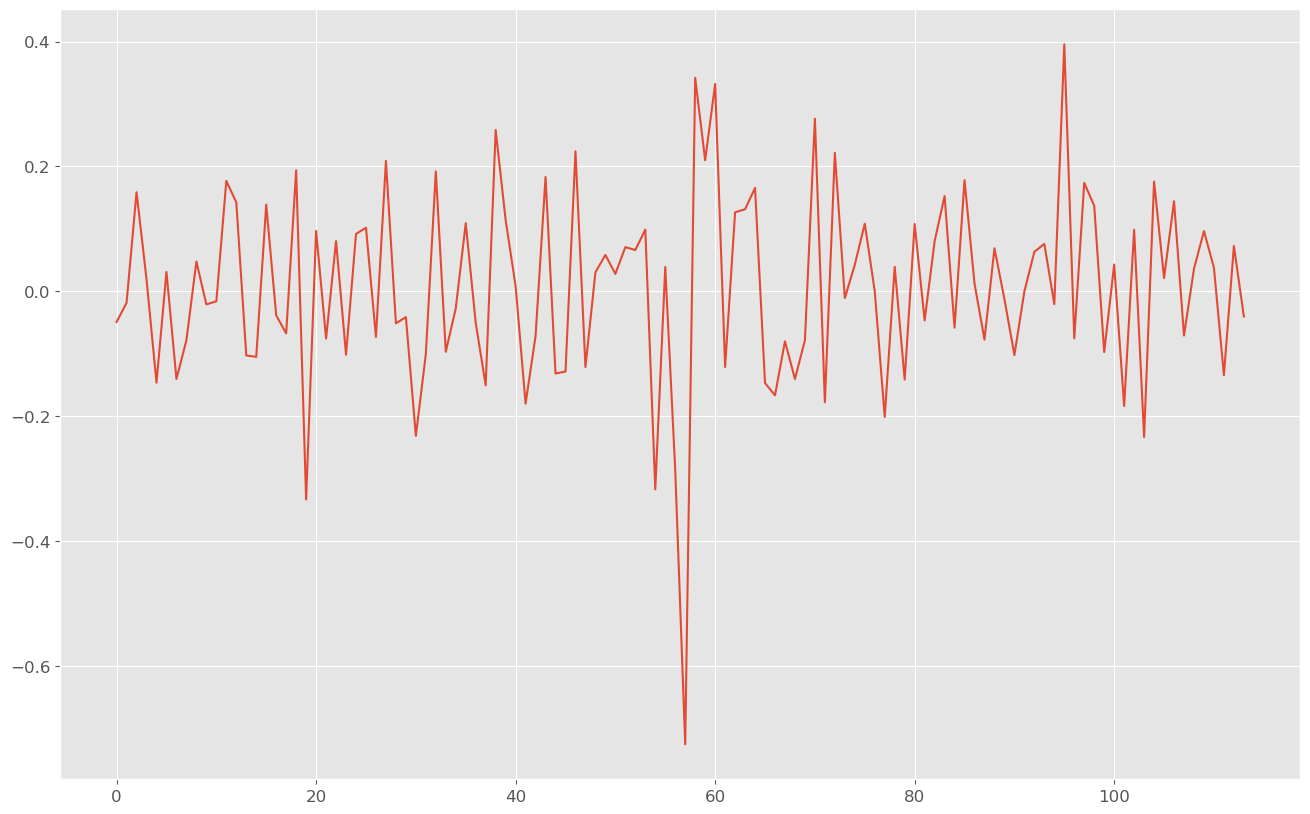

In [79]:
# Diferenciação Para Remover Tendência - Exemplo 2
dados_serie_diff2_df = dsa_diffFunc(dados_serie_log['qtd_acidentes'])
plt.plot(dados_serie_diff2_df)
dados_serie_diff2_df

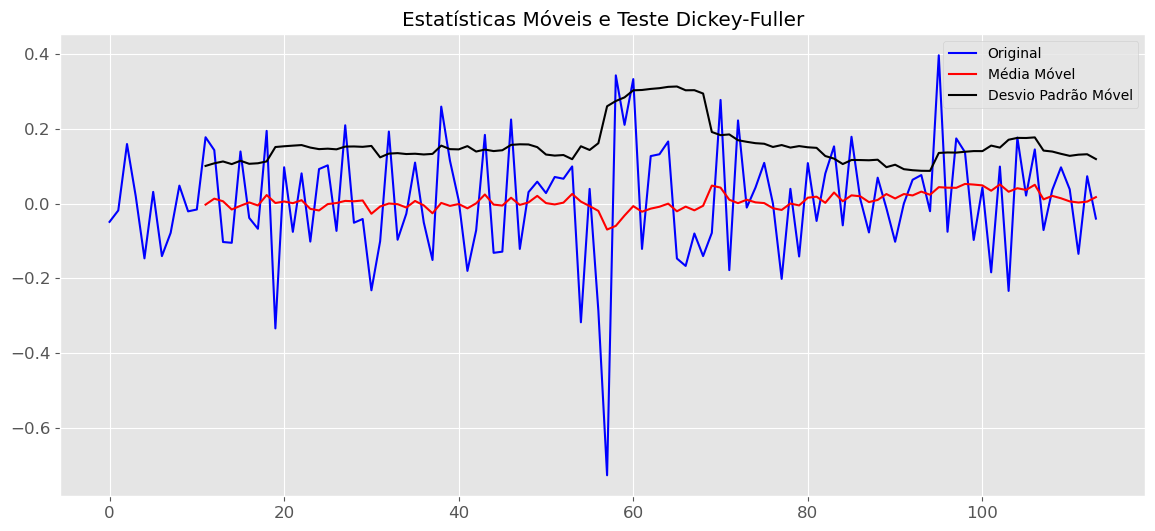


Resultado do Teste Dickey-Fuller:
Estatística do Teste           -6.254538e+00
Valor-p                         4.371399e-08
Número de Lags Consideradas     8.000000e+00
Número de Observações Usadas    1.050000e+02
Valor Crítico (1%)             -3.494220e+00
Valor Crítico (5%)             -2.889485e+00
Valor Crítico (10%)            -2.581676e+00
dtype: float64

Conclusão:
O valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [80]:
dsa_testa_estacionaridade(dados_serie_diff2_df)

## Diferenciação Para Remover Sazonalidade

O exemplo abaixo aplica a função dsa_diffFunc() à última versão da nossa série até aqui, com transformacão de log e diferenciação para remover tendência. Ou seja, aplicamos duas rodadas de diferenciação.

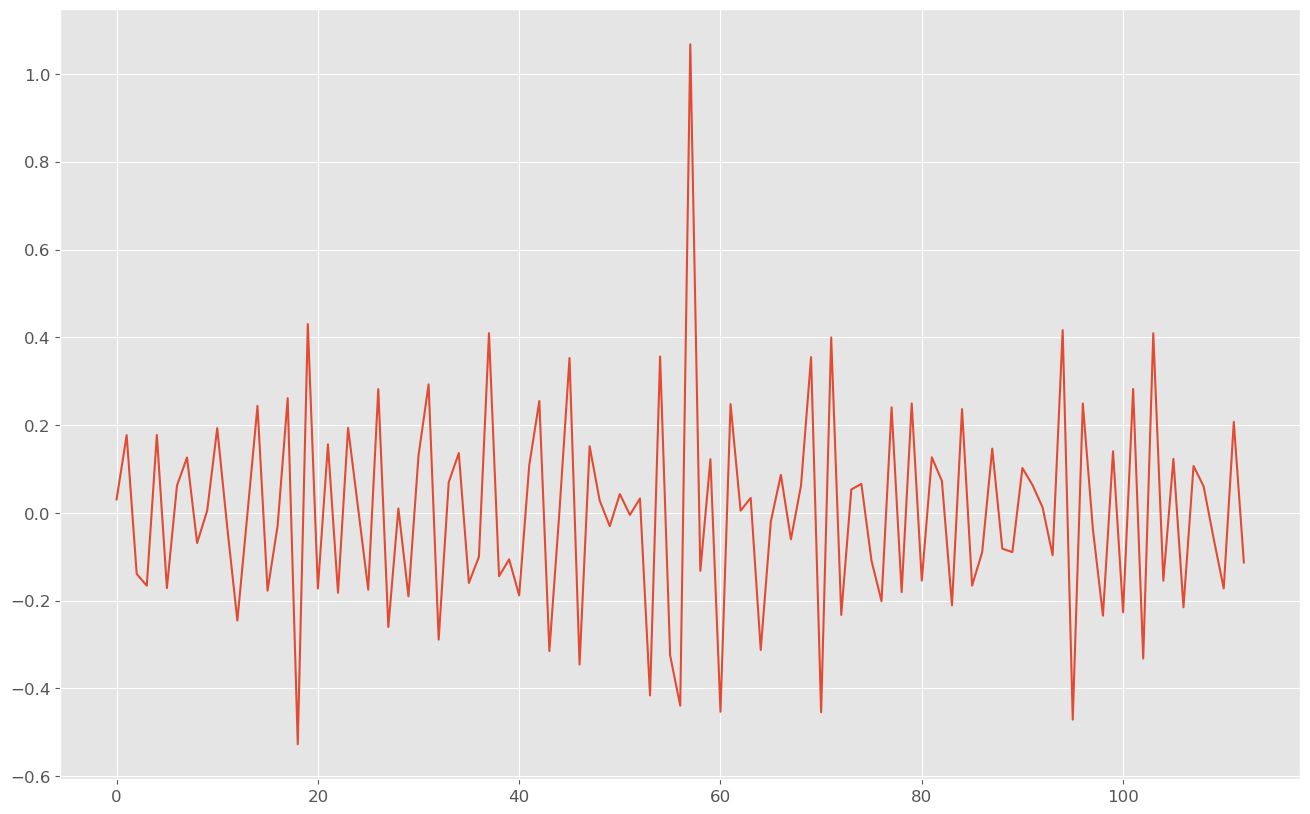

,0
0,0.030574
1,0.177225
2,-0.139144
3,-0.166046
4,0.177443
...,...
108,0.060578
109,-0.058776
110,-0.172235
111,0.207175


In [81]:
# Diferenciação para remover sazonalidade
dados_serie_diff3_df = dsa_diffFunc(dados_serie_diff2_df[0], 1)
plt.plot(dados_serie_diff3_df)
plt.show();
dados_serie_diff3_df

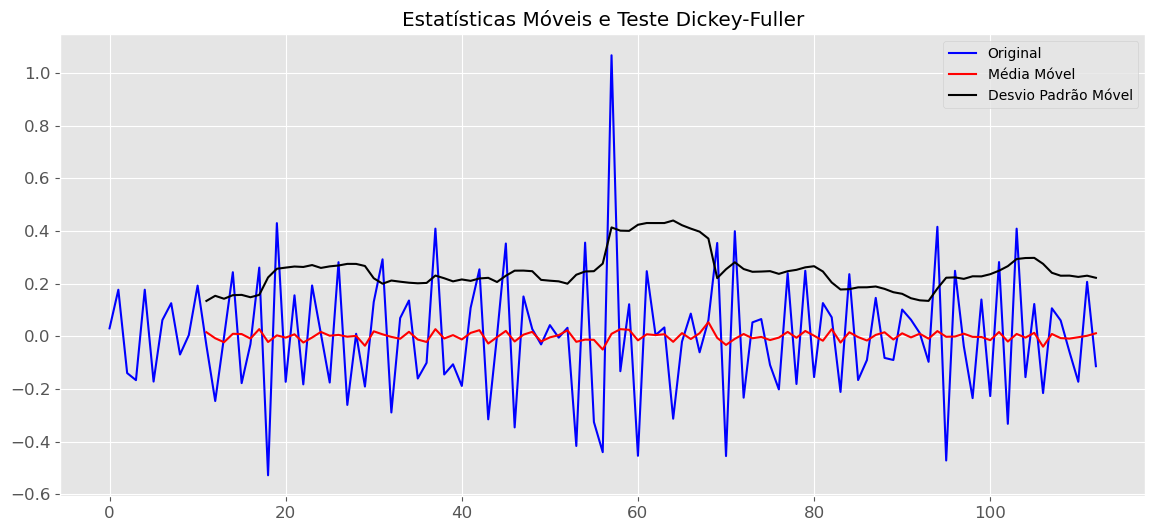


Resultado do Teste Dickey-Fuller:
Estatística do Teste           -7.171206e+00
Valor-p                         2.801473e-10
Número de Lags Consideradas     1.100000e+01
Número de Observações Usadas    1.010000e+02
Valor Crítico (1%)             -3.496818e+00
Valor Crítico (5%)             -2.890611e+00
Valor Crítico (10%)            -2.582277e+00
dtype: float64

Conclusão:
O valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [82]:
dsa_testa_estacionaridade(dados_serie_diff3_df)